Transformer methods for Fake News Detection


 ** Transformer Architecture **

In [3]:
!pip install torch torchvision
#!pip install transformers==2.2.0
!pip install transformers
!pip install seqeval
!pip install tensorboardx
#!pip install simpletransformers==0.9.1
!pip install --upgrade simpletransformers

Requirement already up-to-date: simpletransformers in /usr/local/lib/python3.6/dist-packages (0.51.13)


In [4]:
## Import required libraries
%matplotlib inline

import pandas as pd
import numpy as np

import gc
import requests
import os
import io
from google.colab import drive 
import datetime
from simpletransformers.classification import ClassificationModel

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn import preprocessing 

import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

Cuda available
PyTorch version:  1.7.0+cu101


In [5]:
from simpletransformers.classification import ClassificationArgs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import seaborn as sns
import re

ModuleNotFoundError: No module named 'wordcloud'

In [7]:
 
## dataset-4
drive.mount('/content/gdrive')

train=pd.read_csv('gdrive/My Drive/Colab Notebooks/Data/LIAR/liar_train.csv')
test=pd.read_csv('gdrive/My Drive/Colab Notebooks/Data/LIAR/liar_test.csv')
val=pd.read_csv('gdrive/My Drive/Colab Notebooks/Data/LIAR/liar_dev.csv')

print(train.head())

train_df = train[['statement', 'label-liar']]
eval_df = test[['statement', 'label-liar']]

train_df['statement'] = train_df['statement'].str.lower()
eval_df['statement'] = eval_df['statement'].str.lower()


label_encoder = preprocessing.LabelEncoder() 
train_df['label-liar']= label_encoder.fit_transform(train_df['label-liar'])
eval_df['label-liar']= label_encoder.fit_transform(eval_df['label-liar']) 

print(train_df.head())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      id  ...   label-liar
0  18178  ...  barely-true
1   3350  ...   pants-fire
2  14343  ...    half-true
3  15579  ...  barely-true
4   3690  ...  mostly-true

[5 rows x 8 columns]
                                           statement  label-liar
0         "covid-19 started because we eat animals."           0
1  says michelle obama has 43 people on her staff...           4
2  says president donald trump "has signed more l...           2
3  "us representatives promise implement of un gu...           0
4  "the federal government borrows $4 billion eve...           3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [8]:
df_train = train_df[~train_df['statement'].isna()][['statement','label-liar']]

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15052 entries, 0 to 15051
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   statement   15052 non-null  object
 1   label-liar  15052 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 352.8+ KB


In [10]:
df_train.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15035 entries, 0 to 15051
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   statement   15035 non-null  object
 1   label-liar  15035 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 352.4+ KB


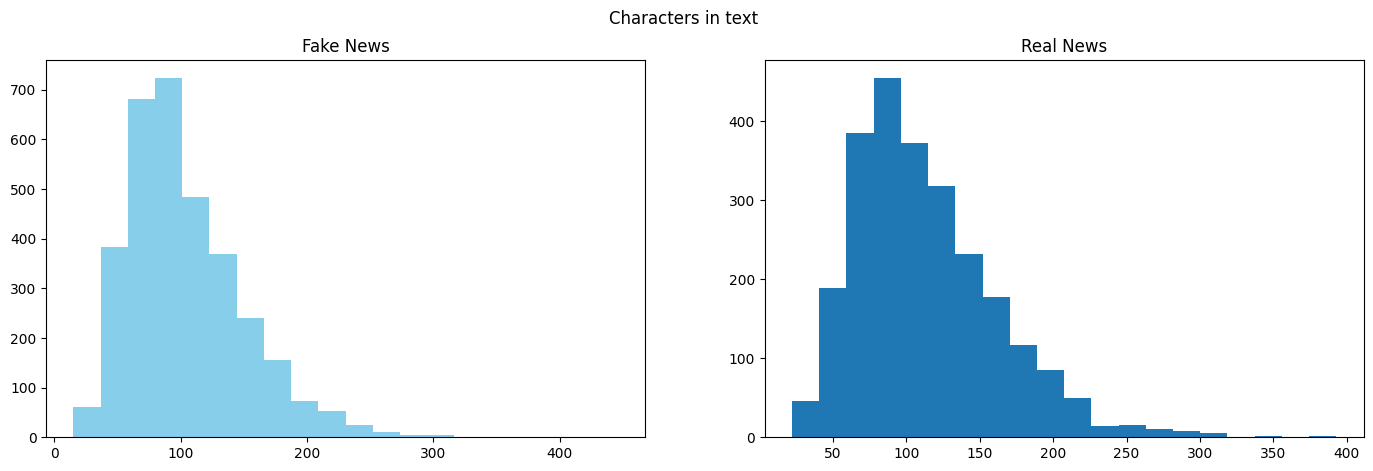

In [11]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df_train[df_train["label-liar"]==1]['statement'].str.len()
ax1.hist(length,bins = 20,color='skyblue')
ax1.set_title('Fake News')
length=df_train[df_train["label-liar"]==0]['statement'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real News')
fig.suptitle('Characters in text')
plt.show()

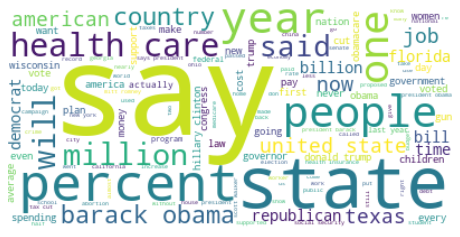

In [12]:
text = " ".join([x for x in df_train.statement])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

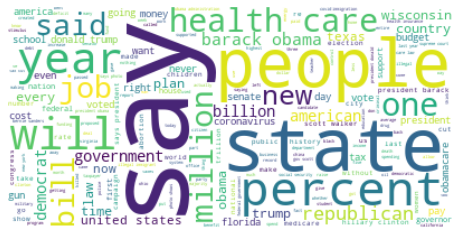

In [13]:
## for fake

text = " ".join([x for x in df_train.statement[df_train['label-liar']==1]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

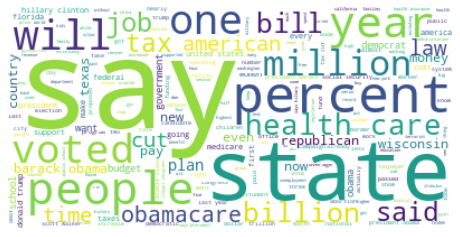

In [14]:
## for fake

text = " ".join([x for x in df_train.statement[df_train['label-liar']==0]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

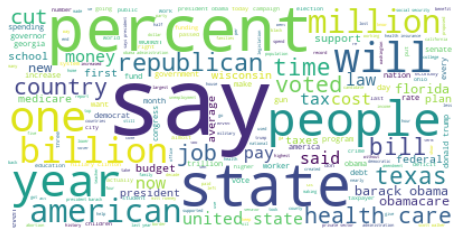

In [15]:
## for fake

text = " ".join([x for x in df_train.statement[df_train['label-liar']==2]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
print('Number of 0 (Not Fake) : ', df_train["label-liar"].value_counts()[0])
print('Number of 1 (Fake) : ', df_train["label-liar"].value_counts()[1])
print('Number of 1 (Fake) : ', df_train["label-liar"].value_counts()[2])
print('Number of 1 (Fake) : ', df_train["label-liar"].value_counts()[3])
print('Number of 1 (Fake) : ', df_train["label-liar"].value_counts()[4])
print('Number of 1 (Fake) : ', df_train["label-liar"].value_counts()[5])

Number of 0 (Not Fake) :  2482
Number of 1 (Fake) :  3270
Number of 1 (Fake) :  2830
Number of 1 (Fake) :  2630
Number of 1 (Fake) :  1775
Number of 1 (Fake) :  2048


In [17]:
# Dataset Preprocessing
def text_cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text) # removing punctuation
    return text

df_train['statement'] = df_train['statement'].apply(text_cleaning)

In [18]:
## for eval

eval_df['statement'] = eval_df['statement'].apply(text_cleaning)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
args = {
   'output_dir': 'outputs/',
   'cache_dir': 'cache/',

   'fp16': False,
   'fp16_opt_level': 'O1',
   'max_seq_length': 128,
   'train_batch_size': 50,
   'eval_batch_size': 50,
   'gradient_accumulation_steps': 1,
   'num_train_epochs': 1,
   'weight_decay': 0,
   'learning_rate': 1e-3,
   'adam_epsilon': 1e-8,
   'warmup_ratio': 0.06,
   'warmup_steps': 0,
   'max_grad_norm': 1.0,

   'logging_steps': 50,
   'evaluate_during_training': False,
   'save_steps': 2000,
   'eval_all_checkpoints': True,
   'use_tensorboard': True,

   'overwrite_output_dir': True,
   'reprocess_input_data': True,
}


In [20]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=6, 
                            #args=args, use_cuda=True)
                            args={'reprocess_input_data': True, 'overwrite_output_dir': True,'fp16': False,'num_train_epochs': 3},use_cuda=True)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [21]:
start=datetime.datetime.now()
model.train_model(df_train)
end=datetime.datetime.now()

exec_time=end-start
print("execution time:", exec_time)


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:395: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15035 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1880 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 3:   0%|          | 0/1880 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1880 [00:00<?, ?it/s]

execution time: 0:21:17.787266


In [22]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:975: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1266 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/159 [00:00<?, ?it/s]

In [23]:
print(model.args)

ClassificationArgs(adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, adafactor_eps=(1e-30, 0.001), adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_beta1=None, adafactor_scale_parameter=True, adafactor_relative_step=True, adafactor_warmup_init=True, eval_batch_size=8, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=True, fp16=False, gradient_accumulation_steps=1, learning_rate=4e-05, local_rank=-1, logging_steps=50, manual_seed=None, max_grad_norm=1.0, max_seq_length=128, model_nam

In [24]:
print(result)
print(model_outputs)

{'mcc': 0.108293401196561, 'eval_loss': 1.907181277589978}
[[ 1.1168375   0.18610868  0.83601558 -0.08776477 -1.02717865 -0.72936779]
 [ 1.30063868  1.01676559  0.66547906 -1.12021041 -0.33869782 -1.73881114]
 [-0.63599122  0.13180566  0.18800843  1.41852069 -2.47110748  1.12715995]
 ...
 [-0.13002023  0.78466189  0.4892534  -0.15422891 -1.41539395 -0.02977927]
 [ 1.66259181 -0.1406378   1.57822466  0.62900603 -2.72072196 -1.35166466]
 [ 0.20947281  0.43112054  0.38343278  1.16957104 -2.17342281  0.43036583]]


In [25]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [26]:
true = eval_df['label-liar'].tolist()
predicted = lst

In [27]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[55, 52, 56, 22,  5, 22],
       [57, 85, 46, 36,  7, 18],
       [50, 51, 72, 73,  2, 18],
       [24, 34, 67, 78,  2, 34],
       [14, 39, 12,  8, 12,  7],
       [19, 40, 39, 64,  1, 45]])

In [28]:
print(sklearn.metrics.classification_report(true,predicted))


              precision    recall  f1-score   support

           0       0.25      0.26      0.26       212
           1       0.28      0.34      0.31       249
           2       0.25      0.27      0.26       266
           3       0.28      0.33      0.30       239
           4       0.41      0.13      0.20        92
           5       0.31      0.22      0.26       208

    accuracy                           0.27      1266
   macro avg       0.30      0.26      0.26      1266
weighted avg       0.28      0.27      0.27      1266



In [29]:
!pip install wandb

In [ ]:

''
import logging

import pandas as pd
import sklearn

import wandb
from simpletransformers.classification import ClassificationArgs,ClassificationModel

start= datetime.datetime.now()

sweep_config = {
    "method": "bayes",  # grid, random
    "metric": {"name": "train_loss", "goal": "minimize"},
    "parameters": {
        "num_train_epochs": {"values": [2, 3, 5]},
        "learning_rate": {"min": 5e-5, "max": 4e-4},
    },
}

sweep_id = wandb.sweep(sweep_config, project="Simple Sweep")

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data
train_df = df_train
train_df.columns = ["text", "labels"]

# Preparing eval data
eval_df = eval_df
eval_df.columns = ["text", "labels"]

model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.evaluate_during_training = True
model_args.manual_seed = 4
model_args.use_multiprocessing = True
model_args.train_batch_size = 16
model_args.eval_batch_size = 8
#model_args.labels_list = ["true", "false"]
model_args.wandb_project = "Simple Sweep"

def train():
    # Initialize a new wandb run
    wandb.init()

    # Create a TransformerModel
    model = ClassificationModel(
        "bert",
        "bert-base-cased",
        num_labels=6,
        use_cuda=True,
        args=model_args,
        sweep_config=wandb.config,
    )

    # Train the model
    model.train_model(train_df, eval_df=eval_df)

    # Evaluate the model
    model.eval_model(eval_df)

    # Sync wandb
    wandb.join()


wandb.agent(sweep_id, train)

end= datetime.datetime.now()
exec_time=end-start
print("execution time:", exec_time)
'''

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
INFO:wandb.agents.pyagent:Starting sweep agent: entity=None, project=None, count=None


Create sweep with ID: xiiokiuk
Sweep URL: https://wandb.ai/aaannuujj/Simple%20Sweep/sweeps/xiiokiuk


wandb: Agent Starting Run: b994fn9e with config:
wandb: 	learning_rate: 0.0002121201772448144
wandb: 	num_train_epochs: 3
wandb: Currently logged in as: aaannuujj (use `wandb login --relogin` to force relogin)


INFO:filelock:Lock 140298482212704 acquired on /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.0d87139f53a477d9f900f8a9020c367863079014bdaf2aa713f4b64cf1782655.lock


Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

INFO:filelock:Lock 140298482212704 released on /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.0d87139f53a477d9f900f8a9020c367863079014bdaf2aa713f4b64cf1782655.lock
INFO:filelock:Lock 140298482209624 acquired on /root/.cache/huggingface/transformers/092cc582560fc3833e556b3f833695c26343cb54b7e88cd02d40821462a74999.1f48cab6c959fc6c360d22bea39d06959e90f5b002e77e836d2da45464875cda.lock


Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

INFO:filelock:Lock 140298482209624 released on /root/.cache/huggingface/transformers/092cc582560fc3833e556b3f833695c26343cb54b7e88cd02d40821462a74999.1f48cab6c959fc6c360d22bea39d06959e90f5b002e77e836d2da45464875cda.lock
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expec

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

INFO:filelock:Lock 140298545342616 released on /root/.cache/huggingface/transformers/6508e60ab3c1200bffa26c95f4b58ac6b6d95fba4db1f195f632fa3cd7bc64cc.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791.lock
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


  0%|          | 0/15035 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/940 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 1 of 3:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/940 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


  0%|          | 0/1266 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/159 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.0, 'eval_loss': 1.765841616774505}


Training loss,1.66265
lr,0.0
global_step,2820
_step,62
_runtime,709
_timestamp,1611042449
mcc,0.0
train_loss,1.64112
eval_loss,1.76584


Training loss,▃▃▇█▅▄▂▂▄▄▃▃▇▅▃▅▅▃▄▄▃▄▅▅▃▃▄▄▆▅▂▄▄▃▃▂▁▃▃▁
lr,▃▅▇███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
_runtime,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇██
_timestamp,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇██
mcc,▁▁▁▁
train_loss,▇▂█▁
eval_loss,▂█▁▁


wandb: Agent Starting Run: p2irx0y8 with config:
wandb: 	learning_rate: 9.947024071362505e-05
wandb: 	num_train_epochs: 5


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/15035 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 3 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


  0%|          | 0/1266 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/159 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.0749254474590568, 'eval_loss': 1.7269968221772392}


Training loss,1.40496
lr,0.0
global_step,4700
_step,103
_runtime,1103
_timestamp,1611043557
mcc,0.07493
train_loss,1.40496
eval_loss,1.727


Training loss,▅▇▆▄▄▅▅▃▅▇▅█▇▅█▄▅▇▅▄▃▄▄▄▅▆▄▂▄▆▅▄▄▄▅▃▃▃▅▁
lr,▃▇███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇███
mcc,▁▆▂▇▇▇█
train_loss,█▇█▅▆█▁
eval_loss,▄█▄▁▅▃▁


wandb: Agent Starting Run: l6f4v47o with config:
wandb: 	learning_rate: 6.873393193755955e-05
wandb: 	num_train_epochs: 5


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/15035 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


  0%|          | 0/1266 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/159 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.10354414060394797, 'eval_loss': 2.743970658044395}


Training loss,0.40339
lr,0.0
global_step,4700
_step,103
_runtime,1034
_timestamp,1611044597
mcc,0.10354
train_loss,0.40339
eval_loss,2.74397


Training loss,▇▇▇▆▇▇▆▆▆▆▆▇▆▆▇▆▄▄█▆▄▅▄▅▃▄▃▃▄▃▃▄▁▃▄▁▂▁▂▁
lr,▃▇███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
mcc,▅█▁█▅▇▆
train_loss,█▆▅▆▄▃▁
eval_loss,▁▁▂▁▅▇█


wandb: Agent Starting Run: 7oepcf8p with config:
wandb: 	learning_rate: 0.00027743265744445205
wandb: 	num_train_epochs: 5


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/15035 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 1 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


  0%|          | 0/1266 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/159 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.0, 'eval_loss': 1.7607976280668247}


Training loss,1.79539
lr,0.0
global_step,4700
_step,103
_runtime,1062
_timestamp,1611045664
mcc,0.0
train_loss,1.79539
eval_loss,1.7608


Training loss,▂▅█▄▂▃▃▂▄▄▆▄▄▃▄▂▁▆▂▂▃▄▂▂▄▄▆▄▃▄▅▃▄▅▃▂▃▆▄▃
lr,▃▇███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
mcc,▁▁▁▁▁▁▁
train_loss,▆▅█▇▁▃▅
eval_loss,▂█▅▃▂▂▁


wandb: Agent Starting Run: jjidooa0 with config:
wandb: 	learning_rate: 0.00022492029173375787
wandb: 	num_train_epochs: 3


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/15035 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/940 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 1 of 3:   0%|          | 0/940 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/940 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


  0%|          | 0/1266 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/159 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.0, 'eval_loss': 1.7672789711622323}


Training loss,1.67186
lr,0.0
global_step,2820
_step,62
_runtime,700
_timestamp,1611046370
mcc,0.0
train_loss,1.70736
eval_loss,1.76728


Training loss,▃▄▅█▅▄▂▂▄▄▂▃▆▃▃▅▄▅▃▅▃▅▃▄▃▃▄▃▅▅▂▃▄▃▃▂▂▃▃▁
lr,▃▅▇███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
_runtime,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇██
_timestamp,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇██
mcc,▁▁▁▁
train_loss,█▃▇▁
eval_loss,▃█▁▁


wandb: Agent Starting Run: bt6xoigv with config:
wandb: 	learning_rate: 0.000354805901407611
wandb: 	num_train_epochs: 5


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/15035 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 1 of 5:   0%|          | 0/940 [00:00<?, ?it/s]

Buffered data was truncated after reaching the output size limit.